# Setup

In [9]:
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle
import sys
from pathlib import Path
import matplotlib.pyplot as plt
# Add the src directory to the path
# sys.path.insert(0, '/Users/yew/code/neon-agbd/src')


# from src.main import compute_site_biomass_full, ALL_SITES

In [10]:
dpids= ['DELA','LENO','TALL','BONA','DEJU','HEAL','SRER','SJER','SOAP',
              'TEAK','CPER','NIWO','RMNP','DSNY','OSBS','JERC','PUUM','KONZ',
              'UKFS','SERC','HARV','UNDE','BART','JORN','DCFS','NOGP','WOOD',
              'GUAN','LAJA','GRSM','ORNL','CLBJ','MOAB','ONAQ','BLAN','MLBS',
              'SCBI','ABBY','WREF','STEI','TREE','YELL']

plot_list = []

for site_id in dpids:
	site_file = f'/Users/yew/code/neon-agbd/output/{site_id}.pkl'
	with open(site_file, 'rb') as f:
		site_dict = pickle.load(f)
		plot_list.append(site_dict['plot_biomass'])

plot_biomass_df = pd.concat(plot_list, ignore_index=True)
plot_biomass_df

,siteID,plotID,year,plotArea_m2,tree_AGBJenkins,tree_AGBChojnacky,tree_AGBAnnighofer,n_trees,small_woody_AGBJenkins,small_woody_AGBChojnacky,small_woody_AGBAnnighofer,n_small_woody_total,n_small_woody_measured,n_unaccounted_trees,total_AGBJenkins,total_AGBChojnacky,total_AGBAnnighofer,growth,growth_cumu
0,DELA,DELA_001,2015,1600.0,45.409061,44.406373,NaN,22,0.612766,0.630304,0.182765,28,18,1,46.021827,45.036676,0.182765,NaN,5.349565
1,DELA,DELA_001,2019,1600.0,66.244231,64.395718,NaN,22,0.949005,0.983348,0.189293,29,18,1,67.193235,65.379065,0.189293,5.292852,5.349565
2,DELA,DELA_001,2022,1600.0,82.694043,80.172850,NaN,23,0.797422,0.823955,0.182765,28,18,1,83.491464,80.996805,0.182765,5.432743,5.349565
3,DELA,DELA_002,2015,1600.0,19.163453,18.812812,NaN,18,1.160753,1.321465,NaN,21,16,1,20.324206,20.134276,0.000000,NaN,1.803042
4,DELA,DELA_002,2019,1600.0,27.295091,26.750160,NaN,18,2.213556,2.477087,NaN,32,18,1,29.508647,29.227247,0.000000,2.296110,1.803042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5680,YELL,YELL_061,2021,1600.0,57.389788,54.643202,NaN,9,0.126688,0.109647,2.315183,31,13,1,57.516476,54.752848,2.315183,1.631986,7.094329
5681,YELL,YELL_061,2022,1600.0,77.843373,73.977564,NaN,9,0.147617,0.128462,2.256751,28,12,1,77.990990,74.106026,2.256751,20.474514,7.094329
5682,YELL,YELL_061,2023,1600.0,79.844777,75.889784,NaN,9,0.172017,0.150159,2.422369,28,12,1,80.016794,76.039943,2.422369,2.025804,7.094329
5683,YELL,YELL_062,2019,1600.0,14.383323,13.127548,NaN,9,0.799640,0.671110,0.982629,43,15,0,15.182963,13.798658,0.982629,NaN,0.759498


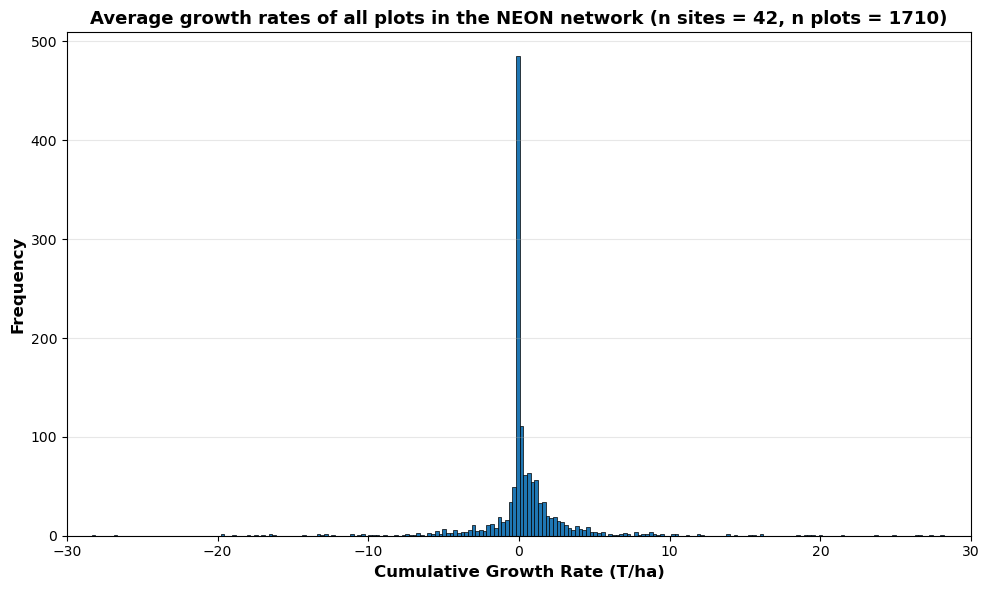


Summary:
  Number of sites: 42
  Number of plots: 1710
  Growth rate range: -177.96 to 66.89 T/ha
  Mean growth rate: 0.30 T/ha
  Median growth rate: 0.00 T/ha


In [20]:
hist_df = plot_biomass_df.drop_duplicates(subset=['plotID']).copy()

# Calculate number of unique sites and plots
n_sites = hist_df['siteID'].nunique()
n_plots = hist_df['plotID'].nunique()

# Create histogram with black edges
plt.figure(figsize=(10, 6))
plt.hist(hist_df['growth_cumu'], bins=1000, edgecolor='black', linewidth=0.5)
plt.xlim(-30, 30)
plt.xlabel('Cumulative Growth Rate (T/ha)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title(f'Average growth rates of all plots in the NEON network (n sites = {n_sites}, n plots = {n_plots})', 
          fontsize=13, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nSummary:")
print(f"  Number of sites: {n_sites}")
print(f"  Number of plots: {n_plots}")
print(f"  Growth rate range: {hist_df['growth_cumu'].min():.2f} to {hist_df['growth_cumu'].max():.2f} T/ha")
print(f"  Mean growth rate: {hist_df['growth_cumu'].mean():.2f} T/ha")
print(f"  Median growth rate: {hist_df['growth_cumu'].median():.2f} T/ha")

In [3]:
site_id = 'DELA'
site_file = f'/Users/yew/code/neon-agbd/output/{site_id}.pkl'
with open(site_file, 'rb') as f:
	site_dict = pickle.load(f)

In [4]:
site_dict['plot_biomass']

,siteID,plotID,year,plotArea_m2,tree_AGBJenkins,tree_AGBChojnacky,tree_AGBAnnighofer,n_trees,small_woody_AGBJenkins,small_woody_AGBChojnacky,small_woody_AGBAnnighofer,n_small_woody_total,n_small_woody_measured,n_unaccounted_trees,total_AGBJenkins,total_AGBChojnacky,total_AGBAnnighofer,growth,growth_cumu
0,DELA,DELA_001,2015,1600.0,45.409061,44.406373,NaN,22,0.612766,0.630304,0.182765,28,18,1,46.021827,45.036676,0.182765,NaN,5.349565
1,DELA,DELA_001,2019,1600.0,66.244231,64.395718,NaN,22,0.949005,0.983348,0.189293,29,18,1,67.193235,65.379065,0.189293,5.292852,5.349565
2,DELA,DELA_001,2022,1600.0,82.694043,80.172850,NaN,23,0.797422,0.823955,0.182765,28,18,1,83.491464,80.996805,0.182765,5.432743,5.349565
3,DELA,DELA_002,2015,1600.0,19.163453,18.812812,NaN,18,1.160753,1.321465,NaN,21,16,1,20.324206,20.134276,0.000000,NaN,1.803042
4,DELA,DELA_002,2019,1600.0,27.295091,26.750160,NaN,18,2.213556,2.477087,NaN,32,18,1,29.508647,29.227247,0.000000,2.296110,1.803042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,DELA,DELA_056,2015,1600.0,128.386273,90.187734,NaN,40,1.032120,2.431035,0.154987,63,36,8,129.418393,92.618769,0.154987,NaN,5.064204
160,DELA,DELA_056,2016,1600.0,120.261858,92.121703,NaN,42,1.000277,2.559184,0.147560,62,35,8,121.262135,94.680887,0.147560,-8.156258,5.064204
161,DELA,DELA_056,2017,1600.0,139.946313,99.267178,NaN,41,0.938999,2.673350,0.154094,67,40,8,140.885312,101.940528,0.154094,19.623177,5.064204
162,DELA,DELA_056,2021,1600.0,154.283267,109.032783,NaN,41,1.202762,3.030683,0.142526,72,35,8,155.486030,112.063466,0.142526,3.650179,5.064204


## Interactive version with Plotly (hover to see plotID)

In [21]:
import plotly.express as px

# Specify the site ID to plot
site_id = 'DELA'

# Load the site data
site_file = f'/Users/yew/code/neon-agbd/output/{site_id}.pkl'
with open(site_file, 'rb') as f:
    site_dict = pickle.load(f)

# Get plot biomass data
o_plots = site_dict['plot_biomass']

# Calculate number of unique plots
n_plots = o_plots['plotID'].nunique()

# Create interactive plot with Plotly
fig = px.line(o_plots, 
              x='year', 
              y='total_AGBJenkins',
              color='plotID',
              markers=True,
              labels={'total_AGBJenkins': 'AGB Jenkins (T/ha)',
                      'year': 'Year',
                      'plotID': 'Plot ID'},
              title=f'Above-Ground Biomass Over Time - Site {site_id} (n plots = {n_plots})',
              hover_data={'plotID': True, 'year': True, 'total_AGBJenkins': ':.2f'})

# Customize layout
fig.update_traces(marker=dict(size=8), line=dict(width=2))
fig.update_layout(
    height=700,
    width=1000,
    hovermode='closest',
    legend=dict(
        orientation="h",
        yanchor="top",
        y=-0.15,
        xanchor="center",
        x=0.5,
        title="Plot ID"
    ),
    xaxis=dict(title_font=dict(size=14, family='Arial, bold')),
    yaxis=dict(title_font=dict(size=14, family='Arial, bold')),
    title_font=dict(size=16, family='Arial, bold'),
    margin=dict(b=150)  # Add bottom margin for legend
)

fig.show()

print(f"\nInteractive plot created for site {site_id}!")
print(f"  Number of plots: {n_plots}")
print(f"  Year range: {o_plots['year'].min()} - {o_plots['year'].max()}")
print(f"\nHover over points to see details.")
print(f"You can also: zoom, pan, select regions, and toggle plot visibility by clicking legend items.")


Interactive plot created for site DELA!
  Number of plots: 44
  Year range: 2015 - 2023

Hover over points to see details.
You can also: zoom, pan, select regions, and toggle plot visibility by clicking legend items.
